# ML Capstone 1 - Part 1 E-Commerce Customer Segmentation

### Dataset: Download CSV file from [here](https://drive.google.com/file/d/1Kyi1Akx299BFhdo77T2MmWg7fLRtMaXm/view?usp=sharing)
 
### Context & Problem statement:

In this project, we delve deep into the thriving sector of online retail by analyzing a transactional dataset from a UK-based retailer, available at the UCI Machine Learning Repository. This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the K-means clustering algorithm. This segmentation will allow us to understand the distinct profiles and preferences of different customer groups. Building upon this, we intend to develop a recommendation system that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.

### Objectives

- Data Cleaning & Transformation: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.
- Feature Engineering: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.
- Data Preprocessing: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.
- Customer Segmentation using K-Means Clustering: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.
- Cluster Analysis & Evaluation: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.
- Recommendation System: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.

# Data Retrieval: 

The first step of this exercise is to extract the dataset (CSV file) from the provided source and thoroughly explore its features and structure. This includes understanding the context and significance of each feature in the dataset.

To start, we will import the necessary libraries for calculations, data analysis, and data visualization.


In [278]:
#importing necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Extracting the dataset from the source 

In [279]:
#loading csv file and reading it using latin1 encoding method which is commonly used for csv files.
#Encounter error while reading csv file, took help from ChatGpt which suggested to use Latin1 ecoding.

ecommerce_file_path = 'ecommerce_data.csv'
ecommerce_data = pd.read_csv(ecommerce_file_path, encoding='latin1')

In [280]:
ecommerce_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The above data from csv files shows a overall summary of three columns from dataset, where there are total 541909 entires of Quantity and unitprice. 

Mean represents the average number of items purchased is about 9.55 items and in the context of UnitPrice the average price is $4.61.

standard deviation for Quantity: A high std of 218.08 indicates wide variation in quantities purchased, with some transactions involving very large quantities. Outliers like large positive suggest returns or errors.

standard deviation for UnitPrice: A high std of $96.76 indicates significant price variability, likely due to a mix of low- and high-priced products. 

In the context of Quantity: Min: Negative values (e.g., -80,995) might represent returns or errors.
Max: The largest purchase quantity is 80,995 items.

Percentiles reveal typical purchase sizes and price ranges, helping understand data distribution.

In [281]:
#head() method from pandas represents first fwe rows of the data.
print(ecommerce_data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


# Exploring the dataset structure, features, Understanding the context and significance of each feature

In [282]:
#info() method shows total no of columns, column names, and their datatypes. Inshort it gives us concise summary of Dataframe.
print(ecommerce_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


Above execution shows there are total of 8 columns in our dataset, where they are distributed like : float64(2), int64(1), object(5) in datatypes.


Later during Data cleaning, we will remove null values, will try to manage outliers so during next exercise data can be use to train our model. 

In [283]:
#printing all the cloumn names from data:
print(ecommerce_data.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [284]:
#printing shape of the dataset, after execution we can see there are total 541909 entires along with 8 columns.
print(ecommerce_data.shape)

(541909, 8)


In [285]:
#printing datatypes of all columns, represting what kind of data they hold.
print(ecommerce_data.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [286]:
categorical_features = ecommerce_data.select_dtypes(include = ['object']).columns
print("Categorical Features:", categorical_features)

Categorical Features: Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')


By considering Datatype Object, we can see all categorical features, these are variables in a dataset that represent categories or labels, rather than numerical values. These features contain discrete, finite values that often represent groups, classes, or names. 

In [287]:
Numerical_features = ecommerce_data.select_dtypes(include = ['int64', 'float64']).columns
print("Numerical Features:", Numerical_features)

Numerical Features: Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')


By considering Datatype int and float, we can see all Numerical features, these are variables in a dataset that contain numeric values. These features represent measurable quantities and can take on a wide range of values, often used for calculations

# Next step is Data preprocessing:

Cleaning the dataset to handle missing values, duplicates, and outliers
Encoding categorical variables and transforming data types as necessary

In [288]:
#Checks for missing values in the DataFrame.
print(ecommerce_data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In the above output : Description has 1,454 missing values.
This column contains the product descriptions. Missing values here might indicate records where the product name wasn't provided.

And for CustomerID has 135,080 missing values.
This is the most problematic column, with a significant number of missing values. It represents customer identifiers, and its absence could hinder customer-specific analysis.


Handling Missing Values: 
Numerical Columns: Replace missing values with the mean or median.
Categorical Columns: Replace missing values with the mode (most frequent value).

In [289]:
numerical_cols = ecommerce_data.select_dtypes(include=['int64', 'float64']).columns
ecommerce_data[numerical_cols] = ecommerce_data[numerical_cols].fillna(ecommerce_data[numerical_cols].median())

For each numerical column (either integer or float), this operation fills the missing values (NaN) with the median value of that column.

In [290]:
categorical_cols = ecommerce_data.select_dtypes(include = ['object']).columns

#Product descriptions might be unique or very diverse, we can impute with a Placeholder we can fill missing descriptions with a placeholder like "No Description" to indicate missing information, which makes the missingness explicit.
ecommerce_data['Description'] = ecommerce_data['Description'].fillna('No Description')


In [291]:
print(ecommerce_data.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Above data shows that there are no missing values or NaN in the dataset anymore.

Next step is to check for any duplicate values in the dataset, after finding no of rows with duplicates we can drop them usinf drop_duplicates method, as executed below.

In [292]:
duplicate_rows = ecommerce_data[ecommerce_data.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 5268


In [293]:
ecommerce_data = ecommerce_data.drop_duplicates()

duplicate_rows = ecommerce_data[ecommerce_data.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 0


# Handling Outliers

Outliers can skew data distributions and negatively affect models. They need to handled before we train the model. 

Below code execution shows that, among the three columns there are some negative values which make no sense if they represent Quantity and UnitPrice, they are being handled by removing negative values and capping or replacing them with lower or upper bounds.

In [294]:
print(ecommerce_data[['Quantity', 'UnitPrice', 'CustomerID']].describe())


            Quantity      UnitPrice     CustomerID
count  536641.000000  536641.000000  536641.000000
mean        9.620029       4.632656   15248.659594
std       219.130156      97.233118    1483.813704
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   14367.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16241.000000
max     80995.000000   38970.000000   18287.000000


In [295]:
# Remove rows with negative quantities
ecommerce_data = ecommerce_data[ecommerce_data['Quantity'] > 0]

# Cap extreme values
q_upper = ecommerce_data['Quantity'].quantile(0.99)
ecommerce_data['Quantity'] = ecommerce_data['Quantity'].clip(upper=q_upper)

In [296]:
# Remove rows with negative or zero unit prices
ecommerce_data = ecommerce_data[ecommerce_data['UnitPrice'] > 0]

# Cap extreme values
up_upper = ecommerce_data['UnitPrice'].quantile(0.99)
ecommerce_data['UnitPrice'] = ecommerce_data['UnitPrice'].clip(upper=up_upper)


In [297]:
# Describe the cleaned data
print(ecommerce_data[['Quantity', 'UnitPrice']].describe())


            Quantity      UnitPrice
count  524878.000000  524878.000000
mean        8.839208       3.238820
std        15.321080       3.232394
min         1.000000       0.001000
25%         1.000000       1.250000
50%         4.000000       2.080000
75%        11.000000       4.130000
max       100.000000      16.980000


By seeing the above data and After handling outliers, we can see that:

The count of records has decreased, indicating that extreme data points were removed.

The means and standard deviations have decreased, which indicates that the data is now more consistent and less affected by extreme values.

The minimum and maximum values have been adjusted to reflect more reasonable values for both Quantity and UnitPrice.

But we haven't removed all the outliers in the datset, we just removed the negative and zeros from columns, to handle the big and small values need to implement the IQR method which instead of removing outliers completely can bring values closer to threshold defined by IQR. Which is shown in the below code:

In [298]:
# Capping Quantity
Q1 = ecommerce_data['Quantity'].quantile(0.25)
Q3 = ecommerce_data['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping
ecommerce_data['Quantity'] = ecommerce_data['Quantity'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

# Repeat for UnitPrice
Q1 = ecommerce_data['UnitPrice'].quantile(0.25)
Q3 = ecommerce_data['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping
ecommerce_data['UnitPrice'] = ecommerce_data['UnitPrice'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)


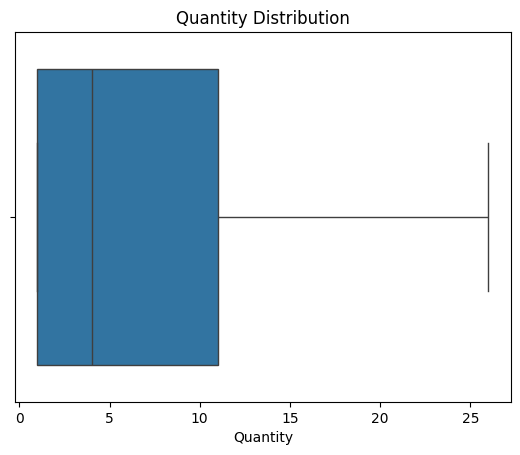

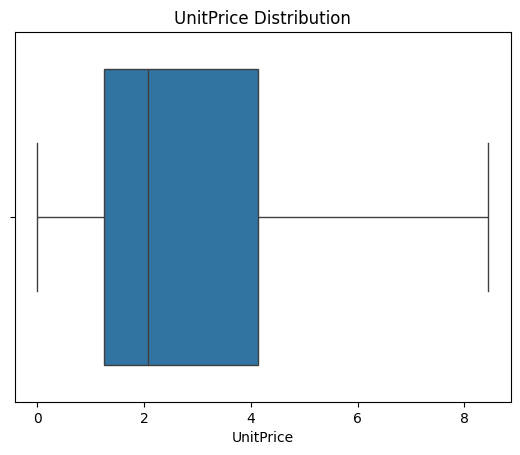

In [299]:
sns.boxplot(x=ecommerce_data['Quantity'])
plt.title('Quantity Distribution')
plt.show()

sns.boxplot(x=ecommerce_data['UnitPrice'])
plt.title('UnitPrice Distribution')
plt.show()

Above Boxplots represents there are no outliers outside the bounds.

Encoding categorical variables and transforming data types:

Below code is using Label Encoding to convert categorical data (specifically, the Country column) into numerical values.

The code imports the LabelEncoder class from the sklearn.preprocessing, This class is used to convert categorical labels (text) into numeric labels (integers). After execution one can see that new integer labes has been assigned to each country.

In [300]:

# Encode Country
label_encoder = LabelEncoder()
ecommerce_data['Country_Label'] = label_encoder.fit_transform(ecommerce_data['Country'])

# View encoded countries
print(ecommerce_data[['Country', 'Country_Label']].drop_duplicates().sort_values(by='Country').head())


          Country  Country_Label
197     Australia              0
34293     Austria              1
38313     Bahrain              2
7279      Belgium              3
157299     Brazil              4


We can transform the InvoiceDate column into a datetime format for time-based analysis as follows:

In [301]:
ecommerce_data['InvoiceDate'] = pd.to_datetime(ecommerce_data['InvoiceDate'])

ecommerce_data['InvoiceYear'] = ecommerce_data['InvoiceDate'].dt.year
ecommerce_data['InvoiceMonth'] = ecommerce_data['InvoiceDate'].dt.month
ecommerce_data['InvoiceDay'] = ecommerce_data['InvoiceDate'].dt.day
ecommerce_data['InvoiceWeekday'] = ecommerce_data['InvoiceDate'].dt.weekday
ecommerce_data['InvoiceHour'] = ecommerce_data['InvoiceDate'].dt.hour

#print(ecommerce_data['InvoiceDate'])
#print(ecommerce_data['InvoiceDay'])

In [302]:
#CustomerId can be cast as Integer and other columns can be converted to appropriate types:
#Other columns which can be incosistent, they can be handled by converting to string.

ecommerce_data['CustomerID'] = ecommerce_data['CustomerID'].astype('category')
ecommerce_data['Quantity'] = ecommerce_data['Quantity'].astype('int')
ecommerce_data['UnitPrice'] = ecommerce_data['UnitPrice'].astype('float')

ecommerce_data['StockCode'] = ecommerce_data['StockCode'].astype('str')
ecommerce_data['Description'] = ecommerce_data['Description'].astype('str')



# Creating new feature "Date_since_last_purchase". 

To create new feature "Date_since_last_purchase" we can use current date and most recent purchase of customer and then can calculate difference betwewen them, which will give us 'Date_since_last_purchase'.

In [303]:
recent_purhase = ecommerce_data.groupby('CustomerID')['InvoiceDate'].max()

ecommerce_data['InvoiceDate'] = pd.to_datetime(ecommerce_data['InvoiceDate'], errors='coerce')

# Check the conversion was successful
print(ecommerce_data['InvoiceDate'].head())

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_9348\3381154826.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [304]:
current_date = pd.to_datetime('today')

# Group by CustomerID and find the most recent purchase date
recent_purchase = ecommerce_data[['CustomerID', 'InvoiceDate']].groupby('CustomerID')['InvoiceDate'].max().reset_index()

# Calculate the number of days since the last purchase
recent_purchase['Date_since_last_purchase'] = (current_date - recent_purchase['InvoiceDate']).dt.days

ecommerce_data = ecommerce_data.merge(recent_purchase[['CustomerID', 'Date_since_last_purchase']], on='CustomerID', how='left')

print(recent_purchase[['CustomerID', 'Date_since_last_purchase']].head())

print("Above data shows the days since actual purchase done by customer, e.g: Customer with ID: 12347 purchased last item 4736 days ago.Not sure if that's what you want here, because if we are looking for date since last purchase it can be calculate by just grouping customerId and max InvoiceDate, as shown below")

recent_purchase_date = ecommerce_data[['CustomerID', 'InvoiceDate']].groupby('CustomerID')['InvoiceDate'].max().reset_index()

print(recent_purchase_date[['CustomerID', 'InvoiceDate']].head())

C:\Users\Dell\AppData\Local\Temp\ipykernel_9348\3182112682.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



  CustomerID  Date_since_last_purchase
0    12346.0                      5074
1    12347.0                      4750
2    12348.0                      4823
3    12349.0                      4767
4    12350.0                      5058
Above data shows the days since actual purchase done by customer, e.g: Customer with ID: 12347 purchased last item 4736 days ago.Not sure if that's what you want here, because if we are looking for date since last purchase it can be calculate by just grouping customerId and max InvoiceDate, as shown below
  CustomerID         InvoiceDate
0    12346.0 2011-01-18 10:01:00
1    12347.0 2011-12-07 15:52:00
2    12348.0 2011-09-25 13:13:00
3    12349.0 2011-11-21 09:51:00
4    12350.0 2011-02-02 16:01:00


C:\Users\Dell\AppData\Local\Temp\ipykernel_9348\3182112682.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Exploratory Data Analysis (EDA):


            Quantity                    InvoiceDate      UnitPrice  \
count  524878.000000                         524878  524878.000000   
mean        6.922186  2011-07-04 15:30:16.317049088       2.962309   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         1.000000            2011-03-28 12:13:00       1.250000   
50%         4.000000            2011-07-20 11:22:00       2.080000   
75%        11.000000            2011-10-19 11:41:00       4.130000   
max        26.000000            2011-12-09 12:50:00       8.450000   
std         7.566009                            NaN       2.397184   

       Country_Label    InvoiceYear   InvoiceMonth     InvoiceDay  \
count  524878.000000  524878.000000  524878.000000  524878.000000   
mean       34.262975    2010.921904       7.552237      15.022472   
min         0.000000    2010.000000       1.000000       1.000000   
25%        36.000000    2011.000000       5.000000       7.000000   
50%        36.000000    

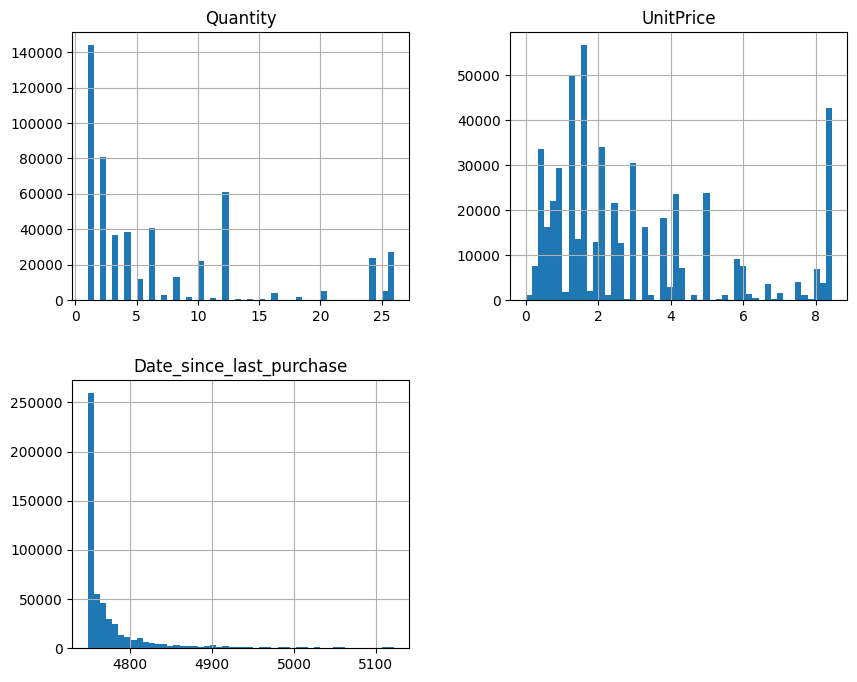

In [305]:
print(ecommerce_data.describe())

ecommerce_data[['Quantity', 'UnitPrice', 'Date_since_last_purchase']].hist(bins = 50, figsize=(10,8))
plt.show()




The above histograms provide valuable insights into the distribution of the data for the three selected columns:

Quantity:

The majority of customers purchased between 2 to 5 items, indicating a common purchase behavior.
A secondary peak is observed between 11 and 13 items, suggesting that a smaller group of customers tends to make larger purchases.

UnitPrice:

Most purchases are for items priced between 2 and 6 units of currency, highlighting that the majority of the inventory is moderately priced.
The distribution tails off for items priced higher, indicating fewer transactions for expensive items.

Date_since_last_purchase:

The most common gap between customer purchases lies between 4700 and 4750 days, reflecting the frequency of inactivity for many customers.
This could point to long-term gaps or a historical skew in the data that might warrant further exploration.

# Key Observations and Correlations and pattern in the new data:

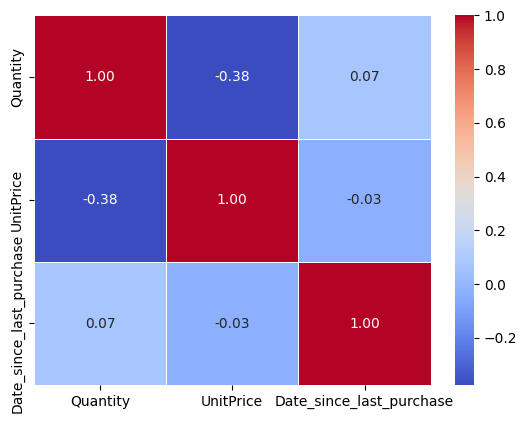

In [306]:
#this part of the code was created by taking help from chatgpt
corr_matrix = ecommerce_data[['Quantity', 'UnitPrice', 'Date_since_last_purchase']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

The heatmap screated after execution of the code visualizes the correlation matrix between three variables: Quantity, UnitPrice, and Date_since_last_purchase (feature newly created).
    

Diagonal Values (1.00): These represent the correlation of each variable with itself, which is always 1.00 and are not significant for interpretation.

Quantity vs. UnitPrice (-0.28): There is a weak negative correlation between quantity and unit price. As the quantity of items purchased increases, the unit price tends to decrease slightly. This suggests that bulk purchases often come with discounts or promotions, which is common in e-commerce.

Quantity vs. Date_since_last_purchase (0.12): This shows a weak positive correlation. Customers who haven't purchased in a while tend to buy slightly larger quantities when they return. Though weak, this could imply that returning customers may stock up after a long absence.

UnitPrice vs. Date_since_last_purchase (-0.04): This indicates a very weak negative correlation. The price of items purchased does not show a significant relationship with how recently a customer made a purchase, implying that customers buy products at different price points regardless of their last purchase date.

In [307]:
#IQR done for newly created feature or variable: "Date_since_last_purchase"
Q1 = ecommerce_data['Date_since_last_purchase'].quantile(0.25)
Q3 = ecommerce_data['Date_since_last_purchase'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping
ecommerce_data['Date_since_last_purchase'] = ecommerce_data['Date_since_last_purchase'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

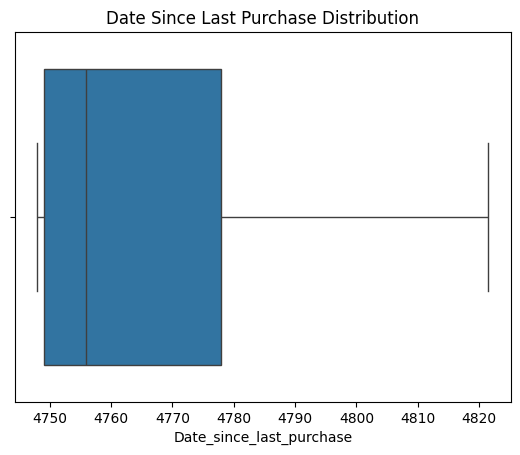

In [308]:
sns.boxplot(x=ecommerce_data['Date_since_last_purchase'])
plt.title('Date Since Last Purchase Distribution')
plt.show()

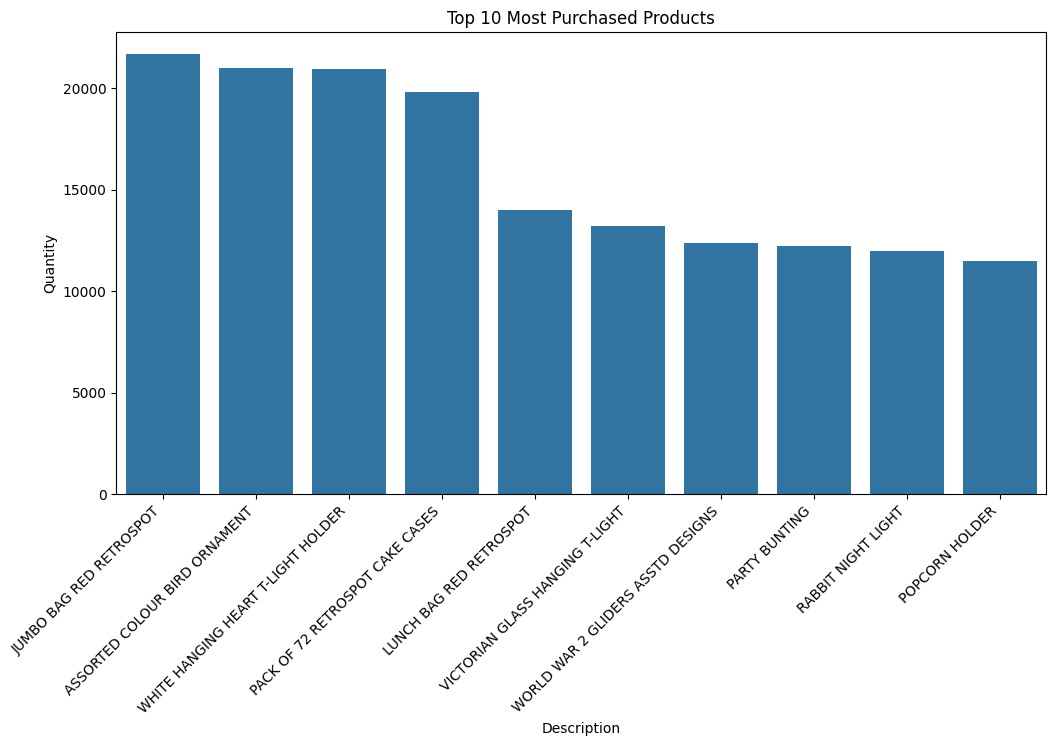

In [309]:
# Top 10 Most Purchased Products, 
# Bewlow plot shows top 10 most purchased items by customers
top_products = ecommerce_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Most Purchased Products')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Quantity')
plt.show()

In [310]:
#importing necessary libraries to perform calculations and plotting graphs.

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [311]:
#to list down all the features we have so far. 
features = ecommerce_data.columns.tolist()
print(f"Features: ", features)

Features:  ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Country_Label', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDay', 'InvoiceWeekday', 'InvoiceHour', 'Date_since_last_purchase']


Some of the above features won't be necessary for training our algorihtm like InvoiceDay, InvoiceMonth, InvoiceWeekday, but they are necessary for calculations. 

In [312]:
print(ecommerce_data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  Country_Label  \
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom             36   
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom             36   
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom             36   
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom             36   
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom             36   

   InvoiceYear  InvoiceMonth  InvoiceDay  InvoiceWeekday  InvoiceHour  \
0         2010           

Below function checks if we our columns has any negative values in it, which then can be removed or replace by mean, median or mode.

In [313]:
def check_negative_values(ecommerce_data, column):
    negative_values = ecommerce_data[ecommerce_data[column] < 0]
    if not negative_values.empty:
        print(f"Negative values found in column '{column}':")
        print(negative_values[column])
    else:
        print(f"No negative values found in column '{column}'.")

#Calling function, we can replace column name ro check if we have any negative values present.
check_negative_values(ecommerce_data, 'Quantity')


No negative values found in column 'Quantity'.


For Feature Selection, Will devide subtasks into parts, after previous EDA we have features as shown in above results, but for segmentation and classification we need to create more features like Frequent buyers, seasonal buyers, and customer who spend higher amount per transcation. 

#### To create new features like Frequent buyers, seasonal buyers, and customer who spend higher amount per transcation.

Below code creates a new feature that stores the value for Monetary which is product of Quantity and unitprices, we are grouping data based on CustomerID and then taking summation. We have already calculate Recency in the Part 1 of Capstone, here we are just adding it or merging it. 

Next is frequcency is calculates by same way like groping on basis of CustomerID and using function nunique to get only unique values from the column. 

In [314]:
ecommerce_data['MonetaryValue'] = ecommerce_data['Quantity'] * ecommerce_data['UnitPrice']

monetary_value_data = ecommerce_data.groupby('CustomerID', observed=False)['MonetaryValue'].sum().reset_index()
monetary_value_data.rename(columns={'MonetaryValue': 'TotalMonetaryValue'}, inplace=True)


# Recency: Already calculated, so we just need to merge it
recency_data = ecommerce_data.groupby('CustomerID', observed=False)['Date_since_last_purchase'].min().reset_index()
recency_data.rename(columns={'Date_since_last_purchase': 'Recency'}, inplace=True)


frequency_data = ecommerce_data.groupby('CustomerID', observed=False)['InvoiceNo'].nunique().reset_index()
frequency_data.rename(columns = {'InvoiceNo': 'Frequency'}, inplace = True)

ecommerce_data = ecommerce_data.merge(frequency_data, on = 'CustomerID', how='left')


In [315]:
#printing columns to check new columns have been added.
print(ecommerce_data.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Country_Label', 'InvoiceYear',
       'InvoiceMonth', 'InvoiceDay', 'InvoiceWeekday', 'InvoiceHour',
       'Date_since_last_purchase', 'MonetaryValue', 'Frequency'],
      dtype='object')


In [316]:
#again checking below for any negative values in newly created columns:

def check_negative_values(ecommerce_data, column):
    negative_values = ecommerce_data[ecommerce_data[column] < 0]
    if not negative_values.empty:
        print(f"Negative values found in column '{column}':")
        print(negative_values[column])
    else:
        print(f"No negative values found in column '{column}'.")

#Calling function, we can replace column name ro check if we have any negative values present.
check_negative_values(ecommerce_data, 'MonetaryValue')


#printing data of newly created columns :
print("After calculating MonetaryValue:")
print(ecommerce_data[['CustomerID', 'MonetaryValue']].head()) 

print("\nTotalMonetaryValue (by CustomerID):")
print(monetary_value_data.head())

print("\nRecency (Min Date Since Last Purchase):")
print(recency_data.head())

print("\nFrequency (Unique Invoices):")
print(frequency_data.head()) 

No negative values found in column 'MonetaryValue'.
After calculating MonetaryValue:
  CustomerID  MonetaryValue
0    17850.0          15.30
1    17850.0          20.34
2    17850.0          22.00
3    17850.0          20.34
4    17850.0          20.34

TotalMonetaryValue (by CustomerID):
  CustomerID  TotalMonetaryValue
0    12346.0               27.04
1    12347.0             3891.06
2    12348.0              551.31
3    12349.0             1363.55
4    12350.0              302.85

Recency (Min Date Since Last Purchase):
  CustomerID  Recency
0    12346.0   4821.5
1    12347.0   4750.0
2    12348.0   4821.5
3    12349.0   4767.0
4    12350.0   4821.5

Frequency (Unique Invoices):
  CustomerID  Frequency
0    12346.0          1
1    12347.0          7
2    12348.0          4
3    12349.0          1
4    12350.0          1


To get the seasonal shoppers, high value customer and frequent buyers, we can use newly created columns to do calculations and create a pie chart to visualize it more clearly.

Lambda funtion helps with calculations, like (x > 0) = Creates a boolean series where each value is True if the corresponding value in x, if it is greater than 0, and False otherwise. This is important to filter out shoppers who only made purchases in a perticular number of seasons.

In [317]:
ecommerce_data['InvoiceMonth'] = ecommerce_data['InvoiceDate'].dt.month
seasonal_data = ecommerce_data.groupby(['CustomerID',  'InvoiceNo',],  observed=False).size().unstack(fill_value=0)

seasonal_shoppers = seasonal_data.apply(lambda x: (x > 0).sum() < 4, axis=1)
seasonal_shoppers = seasonal_shoppers[seasonal_shoppers].index


In [318]:
# Calculate Total Monetary Value per Customer
customer_monetary_data = ecommerce_data.groupby('CustomerID', observed=False)['MonetaryValue'].sum().reset_index()
customer_monetary_data.rename(columns={'MonetaryValue': 'TotalMonetaryValue'}, inplace=True)

# Calculate Average Monetary Value per Transaction using TotalMonetaryValue
customer_monetary_data['AvgMonetaryValue'] = customer_monetary_data['TotalMonetaryValue'] / ecommerce_data.groupby('CustomerID', observed=False)['InvoiceNo'].nunique().values

# Identify High-Value Customers: Top 25% based on AvgMonetaryValue
high_value_threshold = customer_monetary_data['AvgMonetaryValue'].quantile(0.75)
customer_monetary_data['HighValue'] = customer_monetary_data['AvgMonetaryValue'] > high_value_threshold


In [319]:
# Merge Frequency and Monetary Data
segmentation_data = ecommerce_data.merge(customer_monetary_data, on='CustomerID', how='left')

# Add Seasonal Shopper Flag
segmentation_data['SeasonalShopper'] = segmentation_data['CustomerID'].isin(seasonal_shoppers)

# Add Frequent Buyer Flag
frequent_buyer_threshold = segmentation_data['Frequency'].quantile(0.65)
segmentation_data['FrequentBuyer'] = segmentation_data['Frequency'] > frequent_buyer_threshold

print(segmentation_data['FrequentBuyer'].head())


# Assign Segmentation Labels
def assign_segment(row):
    if row['HighValue']:
        return 'High-Value Customer'
    elif row['FrequentBuyer']:
        return 'Frequent Buyer'
    elif row['SeasonalShopper']:
        return 'Seasonal Shopper'
    else:
        return 'Other'

segmentation_data['Segment'] = segmentation_data.apply(assign_segment, axis=1)


0    True
1    True
2    True
3    True
4    True
Name: FrequentBuyer, dtype: bool


Segment
High-Value Customer    294808
Other                  138356
Seasonal Shopper        62163
Frequent Buyer          29551
Name: count, dtype: int64


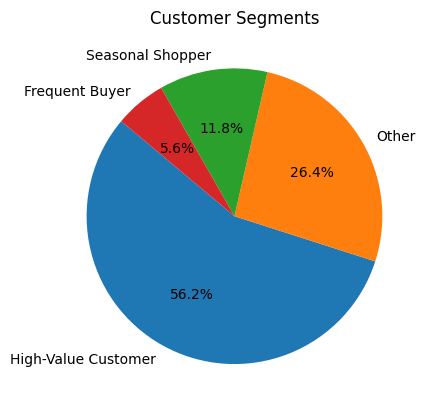

In [320]:
# Check Segmentation Distribution
print(segmentation_data['Segment'].value_counts())

# Visualize Segmentation Distribution to get the insights of overall customer segments:
import matplotlib.pyplot as plt

segmentation_counts = segmentation_data['Segment'].value_counts()
plt.pie(segmentation_counts, labels=segmentation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Segments')
plt.show()



Next task is to scale the numerical values in perticular category: MinMaxScaler method is especially useful when we need all features to have the same range and when we don't want negative values, which is a requirement for some algorithms liek k-means.

In [321]:
#Scaling numerical feature using StandardScaler:

numerical_features = ['Date_since_last_purchase', 'Frequency', 'MonetaryValue']

scaler = MinMaxScaler()
segmentation_data[numerical_features] = scaler.fit_transform(segmentation_data[numerical_features])
print(segmentation_data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  Country_Label  \
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom             36   
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom             36   
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom             36   
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom             36   
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom             36   

   InvoiceYear  ...  InvoiceHour  Date_since_last_purchase  MonetaryValue  \
0         2010  ...  

Encoding categorical data is not a big task, a simple method from LabelEncoder to give each country our dataset a perticular number, which can be seen in result section after below cell.

In [322]:
#Encoding categorical data which is in 'Segment' using LabelEncoder:
label_encoded = LabelEncoder()
segmentation_data['segmentationEncoded'] = label_encoded.fit_transform(segmentation_data['Segment'])

print("Segment Encoding Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Segment Encoding Mapping: {'Australia': 0, 'Austria': 1, 'Bahrain': 2, 'Belgium': 3, 'Brazil': 4, 'Canada': 5, 'Channel Islands': 6, 'Cyprus': 7, 'Czech Republic': 8, 'Denmark': 9, 'EIRE': 10, 'European Community': 11, 'Finland': 12, 'France': 13, 'Germany': 14, 'Greece': 15, 'Hong Kong': 16, 'Iceland': 17, 'Israel': 18, 'Italy': 19, 'Japan': 20, 'Lebanon': 21, 'Lithuania': 22, 'Malta': 23, 'Netherlands': 24, 'Norway': 25, 'Poland': 26, 'Portugal': 27, 'RSA': 28, 'Saudi Arabia': 29, 'Singapore': 30, 'Spain': 31, 'Sweden': 32, 'Switzerland': 33, 'USA': 34, 'United Arab Emirates': 35, 'United Kingdom': 36, 'Unspecified': 37}


For below task, took a little help from chatGpt, wanted to know how you can choose nno of clusters before you we train the model, chatgpt suggested a Elbow method.

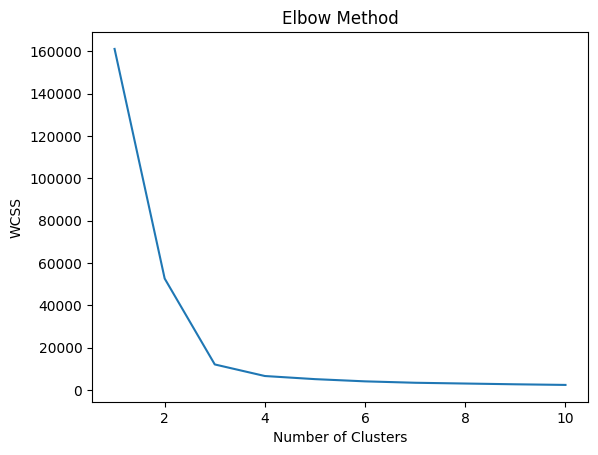

In [323]:
#Now for next task, just checking how manu clusters need to taken into consideration before we train our model:

wcss = []
for i in range(1, 11):  # Trying 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(segmentation_data[numerical_features])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Above graph suggest that k=2, k=3 might be good idea to train our model, bcs that's the point where we can see elbow is formed. Which is enough for us to understand that k=2,3 might be a good choice for our dataset.

Now as Elbow method suggested use of 3 clusters might be a good idea for our Dataset, We will apply k means clustering an unsupervised ML algorithm to it.

In [324]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import davies_bouldin_score

from sklearn.decomposition import PCA
import seaborn as sns

In [325]:
print(segmentation_data.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Country_Label', 'InvoiceYear',
       'InvoiceMonth', 'InvoiceDay', 'InvoiceWeekday', 'InvoiceHour',
       'Date_since_last_purchase', 'MonetaryValue', 'Frequency',
       'TotalMonetaryValue', 'AvgMonetaryValue', 'HighValue',
       'SeasonalShopper', 'FrequentBuyer', 'Segment', 'segmentationEncoded'],
      dtype='object')


In [326]:

# Applying K-Means with the chosen number of clusters
optimal_clusters = 3  # This variable stores the no of cluster we can use, which can be changed in future.
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)

numerical_features = [col for col in numerical_features if col != 'RecencyScore']

# Fit the model to the numerical features
kmeans.fit(segmentation_data[numerical_features])

# Assign cluster labels to each data point
segmentation_data['Cluster'] = kmeans.labels_

#first few rows to see the assigned clusters
print(segmentation_data[['CustomerID', 'Cluster']].head(20))


   CustomerID  Cluster
0     17850.0        2
1     17850.0        2
2     17850.0        2
3     17850.0        2
4     17850.0        2
5     17850.0        2
6     17850.0        2
7     17850.0        2
8     17850.0        2
9     13047.0        1
10    13047.0        1
11    13047.0        1
12    13047.0        1
13    13047.0        1
14    13047.0        1
15    13047.0        1
16    13047.0        1
17    13047.0        1
18    13047.0        1
19    13047.0        1


Below code shows how many customers are assigned to each cluster.

In [327]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_features)
print("Cluster Centers:")
print(cluster_centers)


Cluster Centers:
   Date_since_last_purchase  Frequency  MonetaryValue
0                  0.013605   1.000000       0.040948
1                  0.160829   0.016264       0.069763
2                  0.881373   0.002013       0.068715


Below code shows: The centroid of each cluster. This is the average position of all customers in a cluster across the features.

In [328]:
cluster_counts = segmentation_data['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)


Cluster Counts:
Cluster
1    284758
0    132457
2    107663
Name: count, dtype: int64


Interpretation:

Each feature gives a profile of the customers in that cluster.
For example:
    
Cluster 0: Customers are frequent buyers (high Frequency) but have lower MonetaryValue and make purchases soon after the last one (Date_since_last_purchase is low).
Cluster 1: Customers are less frequent buyers (Frequency is low) but have moderate MonetaryValue.
Cluster 2: Customers rarely make purchases (low Frequency and high Date_since_last_purchase) but spend moderate amounts (MonetaryValue).

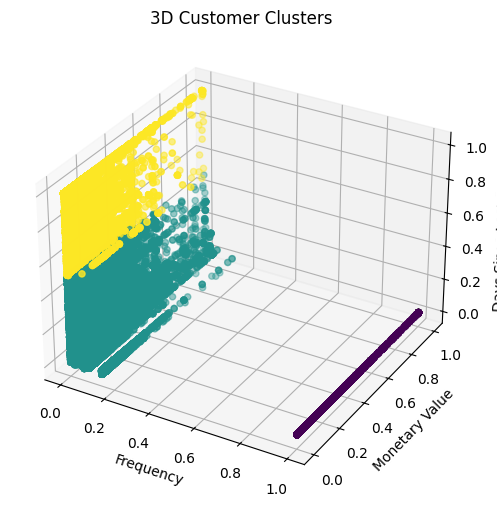

In [329]:
#to create a below 3d plot of three features, took help from Chatgpt so I can clearly see how the clusters are scattered in 3 dimension.

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(segmentation_data['Frequency'], segmentation_data['MonetaryValue'], 
           segmentation_data['Date_since_last_purchase'], c=segmentation_data['Cluster'], cmap='viridis')
ax.set_title('3D Customer Clusters')
ax.set_xlabel('Frequency')
ax.set_ylabel('Monetary Value')
ax.set_zlabel('Days Since Last Purchase')
plt.show()


What the Graph Shows: 

Axes:

Frequency (x-axis): Represents how often customers make purchases.
Monetary Value (y-axis): Represents how much customers spend (scaled between 0 which is lowest and 1 is highest).
Third feature (z-axis): Likely represents a temporal aspect (Date_since_last_purchase).


What we can interepret from the 3-D plot.?

1. Clear Separation:
There is a visible separation between the clusters, meaning the algorithm has identified distinct groups effectively.
2. Logical Grouping:
For example, one cluster (likely the purple group) represents infrequent, low-spending customers, which makes sense.

Below code is use get value for Davies-Bouldin Index,so we can check how the algorithm is doing on our data and also it is a metric for validating the quality of clustering.

In [330]:

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(segmentation_data[numerical_features], kmeans.labels_)
print(f'Davies-Bouldin Index: {db_index:.2f}')


Davies-Bouldin Index: 0.34


An approximate Davies-Bouldin Index of 0.33 is a great result, as lower values indicate better clustering.

Cluster Characteristics:
   Date_since_last_purchase  Frequency  MonetaryValue  Cluster
0                  0.013605   1.000000       0.040948        0
1                  0.160829   0.016264       0.069763        1
2                  0.881373   0.002013       0.068715        2
Cluster Statistics:
         Date_since_last_purchase  Frequency  MonetaryValue
Cluster                                                    
0                        0.013605   1.000000       0.040948
1                        0.160829   0.016264       0.069763
2                        0.881373   0.002013       0.068715


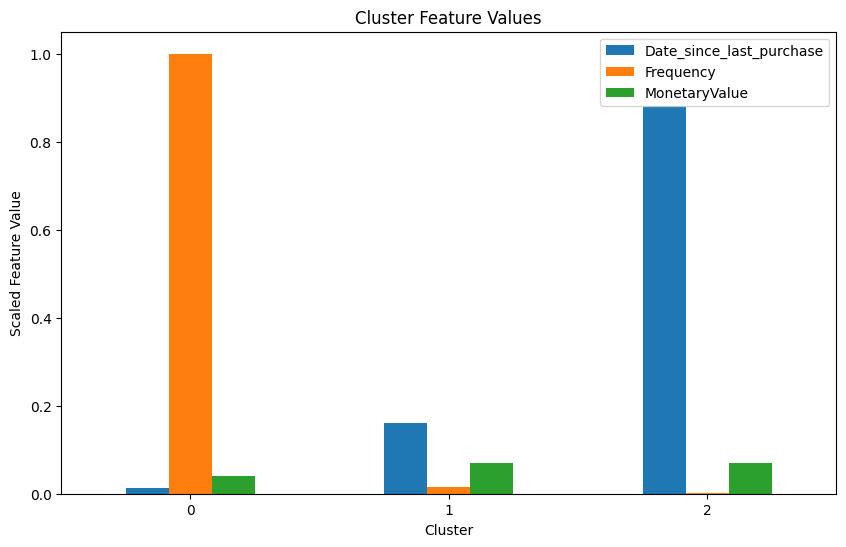

In [331]:
# Converting cluster centers to a DataFrame for better interpretation
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_features)
cluster_centers['Cluster'] = cluster_centers.index

print("Cluster Characteristics:")
print(cluster_centers)

# Adding descriptive statistics per cluster for interpretation
cluster_stats = segmentation_data.groupby('Cluster')[numerical_features].mean()
print("Cluster Statistics:")
print(cluster_stats)

# Visualize the feature importance
cluster_centers.set_index('Cluster').plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Feature Values')
plt.ylabel('Scaled Feature Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()


Insights from the above bar chart:

Cluster 0: Dominated by high Frequency of purchases, suggesting these customers are frequent buyers.
Cluster 1: Higher value for Date_since_last_purchase, indicating customers who made purchases long ago (inactive or lapsed customers).
Cluster 2: Higher values for MonetaryValue, meaning these are high-value customers who spend a lot per purchase but may not buy frequently.

Below code shows 2D scatter plot is a Principal Component Analysis (PCA) projection of the data. It reduces the dimensionality of the features into two principal components while retaining as much variance as possible.

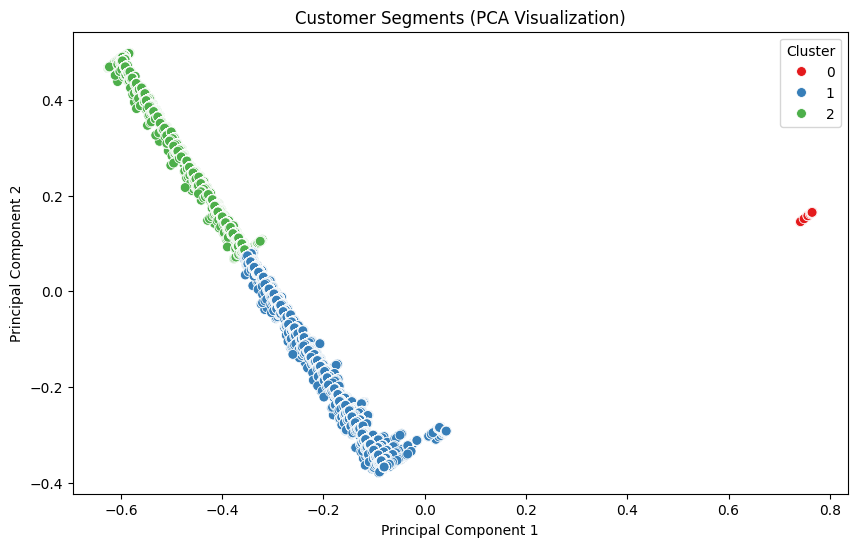

In [332]:
#PCA to reduce to 2 dimensions, which can be change to 3 dimensions if needed to see clusters scattering more clearly.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(segmentation_data[numerical_features])

# Below code snippets creates a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=50)
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


Cluster 0 (Red): Clearly separated and forms a distinct group, likely representing high-frequency, regular customers with unique purchasing behaviors.
Cluster 1 (Blue) and Cluster 2 (Green): Overlap partially, which may suggest some similarities between the clusters (e.g., overlap in spending patterns or frequency).

Next task is to use Supervised alogrithm to do Classification on newly created dataset after K-means, we can start with Random Forest and though this can easily be adapted to other algorithms like Gradient Boosting or Logistic Regression.

Below  code splits the dataset into Training, validation and testing, Also we know now that new column 'Segment' is in the dataframe which will act as a output variable for our training and input feature are in Segmentation data.

In [333]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 'segmentation_data' is dataframe and 'Segment' is the target column

# Features (e.g., Date_since_last_purchase, Frequency, MonetaryValue)
features = ['Date_since_last_purchase', 'Frequency', 'MonetaryValue',]
X = segmentation_data[features]

# Target (cluster label from k-means)
y = kmeans.labels_

# Split data into training, validation, and test sets (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale features (optional but recommended for certain algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


In [334]:
# Display the columns of the dataset
print(segmentation_data.columns)
print(segmentation_data.head())

print(segmentation_data['Cluster'].unique())

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Country_Label', 'InvoiceYear',
       'InvoiceMonth', 'InvoiceDay', 'InvoiceWeekday', 'InvoiceHour',
       'Date_since_last_purchase', 'MonetaryValue', 'Frequency',
       'TotalMonetaryValue', 'AvgMonetaryValue', 'HighValue',
       'SeasonalShopper', 'FrequentBuyer', 'Segment', 'segmentationEncoded',
       'Cluster'],
      dtype='object')
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  Country_Label  \
0 2010-12-01 08:26:00 

# Classification for Segment Prediction

In [335]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Select the input features (numerical columns for logistic regression)
numerical_features = ['Date_since_last_purchase', 'Frequency', 'MonetaryValue', 'TotalMonetaryValue', 'AvgMonetaryValue']

# Define the output variable
X = segmentation_data[numerical_features]  # Input features
y = segmentation_data['Segment']  # Output variable

# Encode the target variable (if necessary)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [336]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [337]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=200, class_weight='balanced')

# Train the model using the training data
logreg.fit(X_train, y_train)




LogisticRegression(class_weight='balanced', max_iter=200)

In [338]:
# Make predictions on the validation set
y_val_pred = logreg.predict(X_val)

# Calculate accuracy, precision, recall, and F1-score
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

# Print the evaluation metrics for validation set
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
print(f"Validation F1-Score: {val_f1:.4f}")


Validation Accuracy: 0.6413
Validation Precision: 0.6087
Validation Recall: 0.6413
Validation F1-Score: 0.6192


C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [339]:
# Make predictions on the test set
y_test_pred = logreg.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the evaluation metrics for test set
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")


C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Test Accuracy: 0.6386
Test Precision: 0.6058
Test Recall: 0.6386
Test F1-Score: 0.6162



Evaluation of Metrics (Accuracy, Precision, Recall, F1-Score):

Accuracy: Measures the overall correctness of the model (how often it predicts the right class).

Precision: Measures the proportion of positive predictions that are actually correct.

Recall: Measures the proportion of actual positives that are correctly predicted by the model.

F1-Score: The harmonic mean of precision and recall, offering a balance between them, especially useful for imbalanced classes.
Cross-Validation:

Cross-validation gives us an idea of how the model performs across different subsets of the data, helping to detect overfitting and ensuring that the model generalizes well.

In [340]:
# Perform cross-validation on the training set
cross_val_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

# Print the average cross-validation score
print(f"Average Cross-Validation Accuracy: {cross_val_scores.mean():.4f}")


Average Cross-Validation Accuracy: 0.6387


Refinements which can be done:

Segmentation & Classification:

feature selection can be Improved by adding new features e.g., recencyscore, purchasing patterns.
Optimize clustering using Elbow which is already done, No of cluster can be change.



